In [410]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
from sklearn.model_selection import train_test_split

In [411]:
df = pd.read_csv("fraud.csv")

In [412]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.698044,-0.044198,1.681167,0.974523,-0.245693,0.347156,0.195166,0.083709,0.332076,...,-0.025289,0.383462,-0.177126,0.110510,0.246612,-0.392311,0.337487,-0.064181,149.62,0
1,0.0,0.611828,0.161626,0.110348,0.316899,0.043586,-0.061836,-0.064189,0.072178,-0.233160,...,-0.311883,-0.881473,0.162398,-0.561148,0.320729,0.261163,-0.022699,0.044887,2.69,0
2,1.0,-0.697298,-0.813846,1.175337,0.268550,-0.365429,1.351797,0.644689,0.210063,-1.382624,...,0.342582,1.065046,1.458087,-1.138128,-0.628605,-0.288550,-0.139870,-0.182155,378.66,0
3,1.0,-0.496026,-0.112483,1.188450,-0.610452,-0.007486,0.936388,0.193546,0.320117,-1.266119,...,-0.149605,0.007278,-0.305146,-1.941089,1.242039,-0.460383,0.158494,0.187356,123.50,0
4,2.0,-0.594568,0.533027,1.026537,0.284994,-0.295709,0.072017,0.482983,-0.229449,0.746458,...,-0.013027,1.101757,-0.220391,0.233258,-0.395245,1.041986,0.554455,0.655902,69.99,0


### Check for the null values

In [413]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [416]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.003038,-0.002511,0.001069,-0.002098,0.001327,-0.000856,0.001467,-0.000725,-0.001457,...,-0.000512,-0.000021,0.000318,0.000354,-0.000446,0.000310,0.004455,0.001668,88.472687,0.001667
std,47481.047891,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,250.399437,0.040796
min,0.000000,-28.956239,-44.158375,-32.031662,-4.018693,-82.601759,-19.641043,-35.479777,-62.097827,-12.263038,...,-48.114286,-15.089554,-71.841533,-4.683788,-19.752486,-5.403038,-57.020918,-47.039123,0.000000,0.000000
25%,54204.750000,-0.470195,-0.364559,-0.589708,-0.601148,-0.500963,-0.577381,-0.450049,-0.177115,-0.588065,...,-0.315378,-0.749016,-0.259264,-0.585267,-0.609119,-0.677858,-0.178501,-0.161018,5.600000,0.000000
50%,84692.500000,0.010464,0.038835,0.119285,-0.015732,-0.038829,-0.206593,0.033282,0.018572,-0.048011,...,-0.040669,0.009212,-0.017891,0.067724,0.031231,-0.108228,0.003736,0.034411,22.000000,0.000000
75%,139298.000000,0.675590,0.485991,0.680700,0.523020,0.444600,0.297908,0.464682,0.276241,0.544026,...,0.257206,0.729066,0.236889,0.726088,0.672781,0.498413,0.230473,0.238627,77.510000,0.000000
max,172792.000000,1.260214,13.395087,6.219043,11.932920,25.273389,55.034118,98.226798,16.968859,14.235602,...,37.577686,14.496009,36.120452,7.569926,14.426891,7.296596,79.880447,103.186167,25691.160000,1.000000


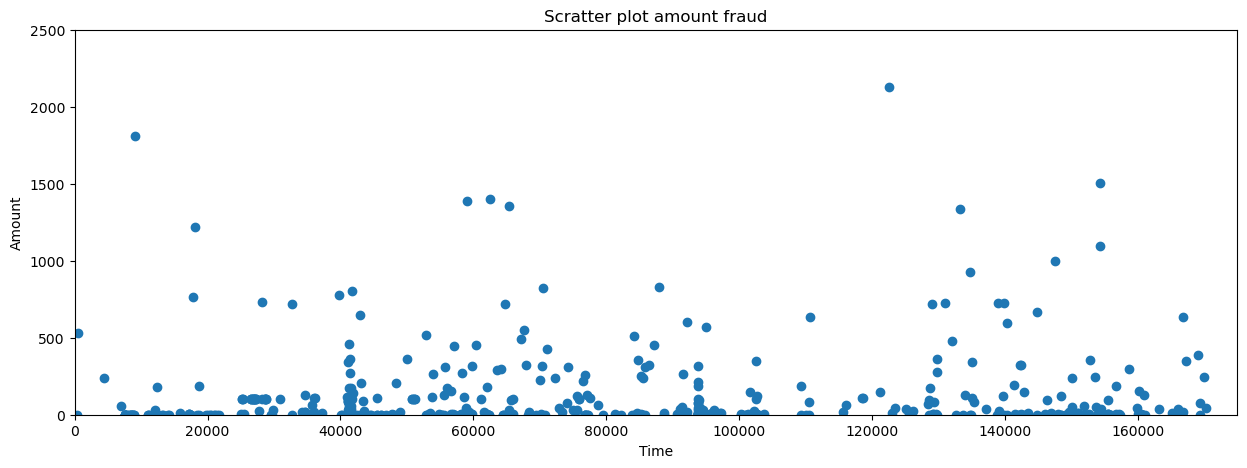

In [417]:
df_fraud = df[df['Class'] == 1] 
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

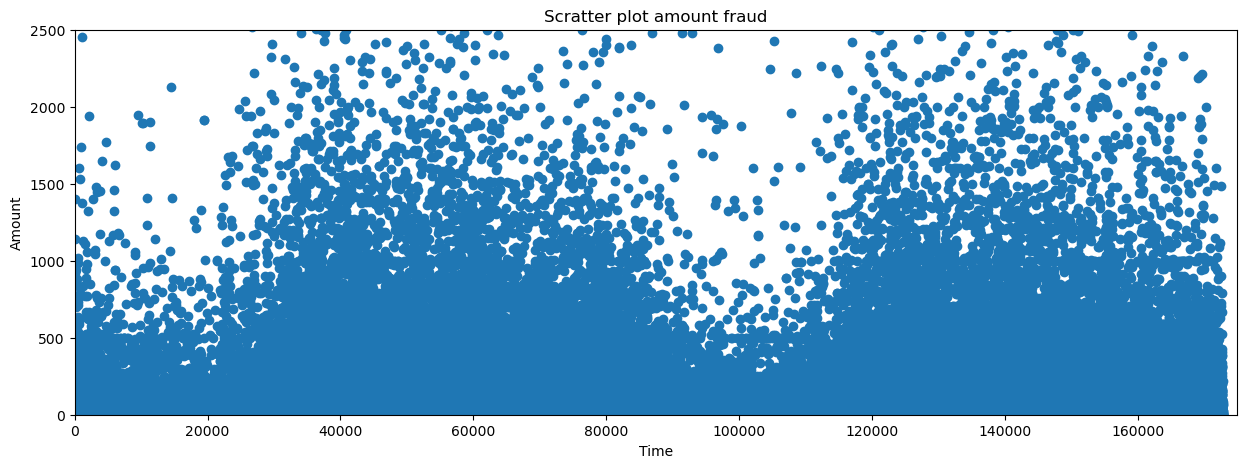

In [418]:
df_fraud = df[df['Class'] == 0] 
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

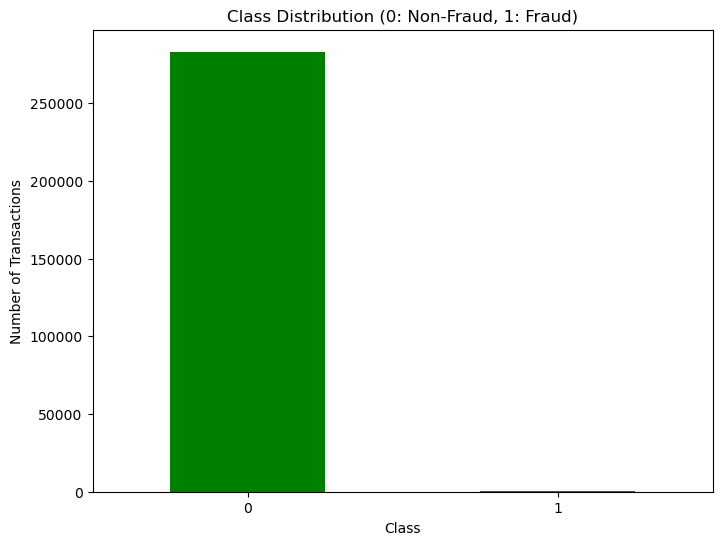

In [419]:
import pandas as pd
import matplotlib.pyplot as plt

class_distribution = df['Class'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

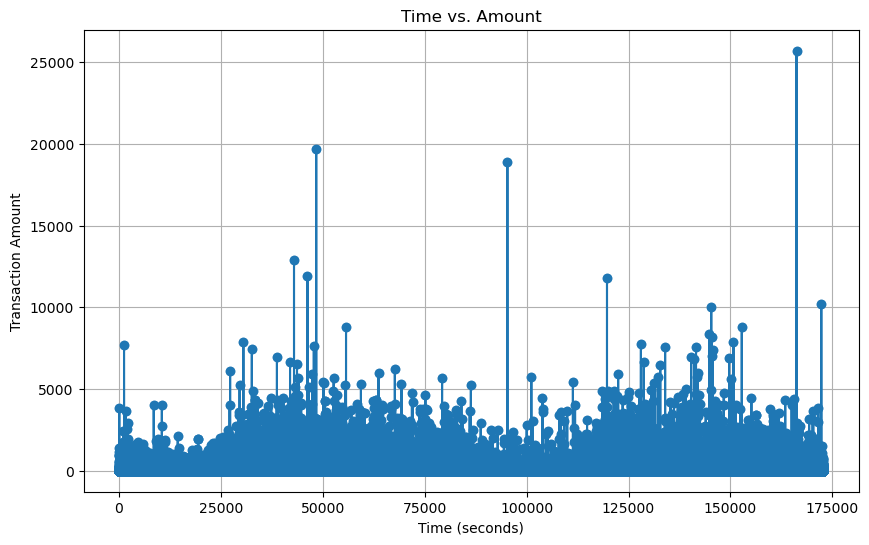

In [420]:
# Plotting Time vs. Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Amount'], alpha=0.5)

plt.plot(df['Time'], df['Amount'], marker='o', linestyle='-')
plt.title('Time vs. Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

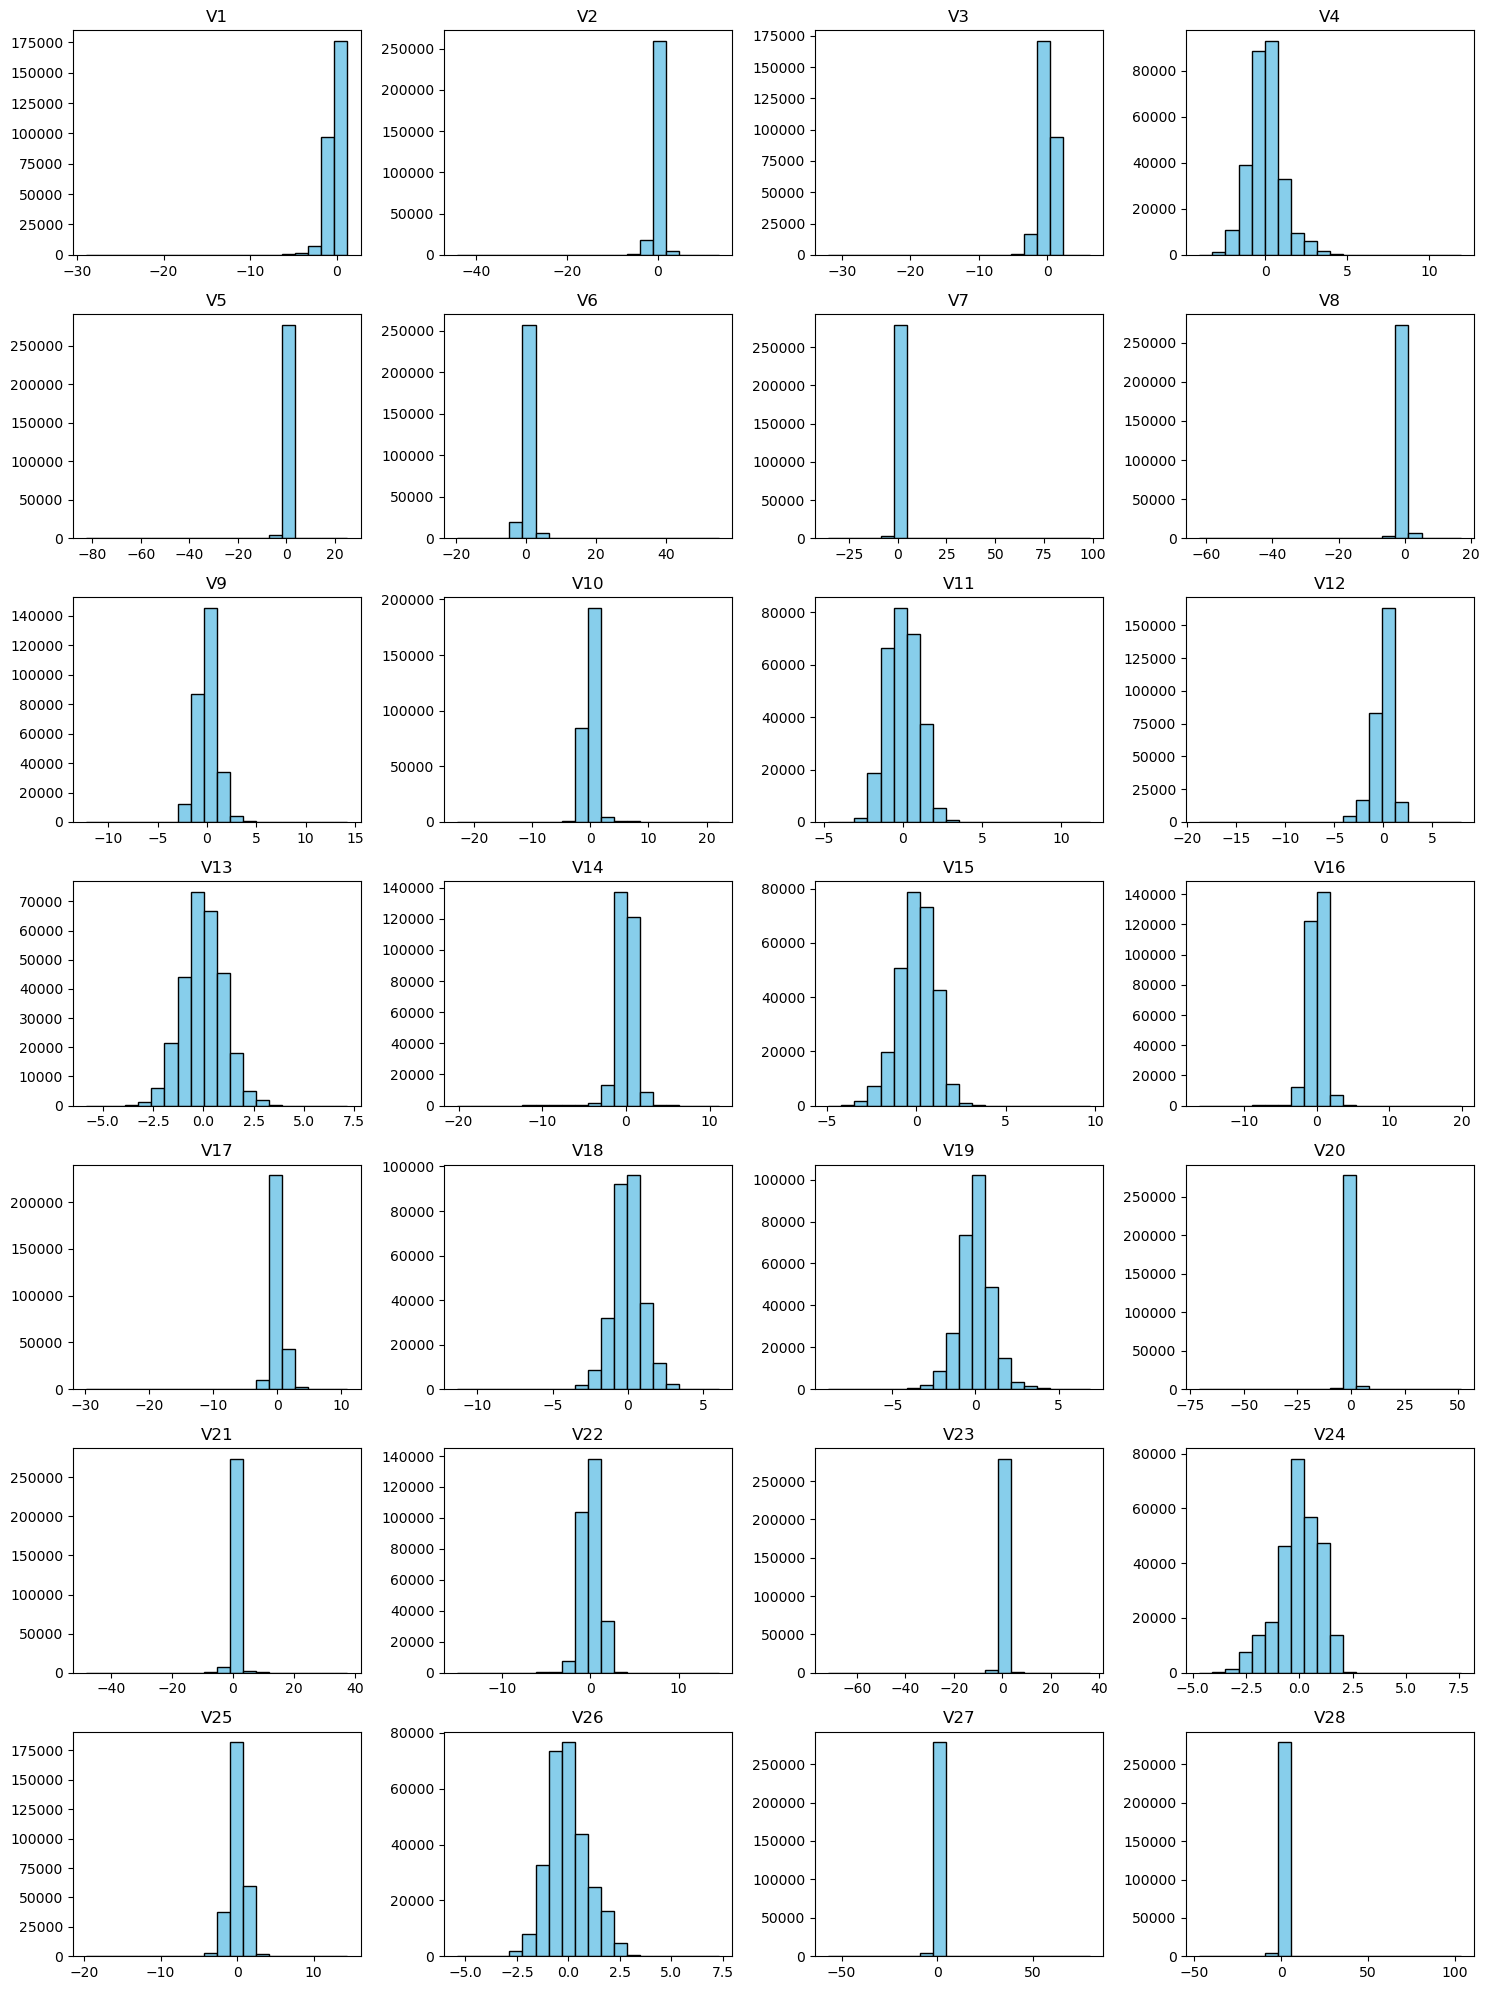

In [421]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns[1:29]): 
    plt.subplot(7, 4, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

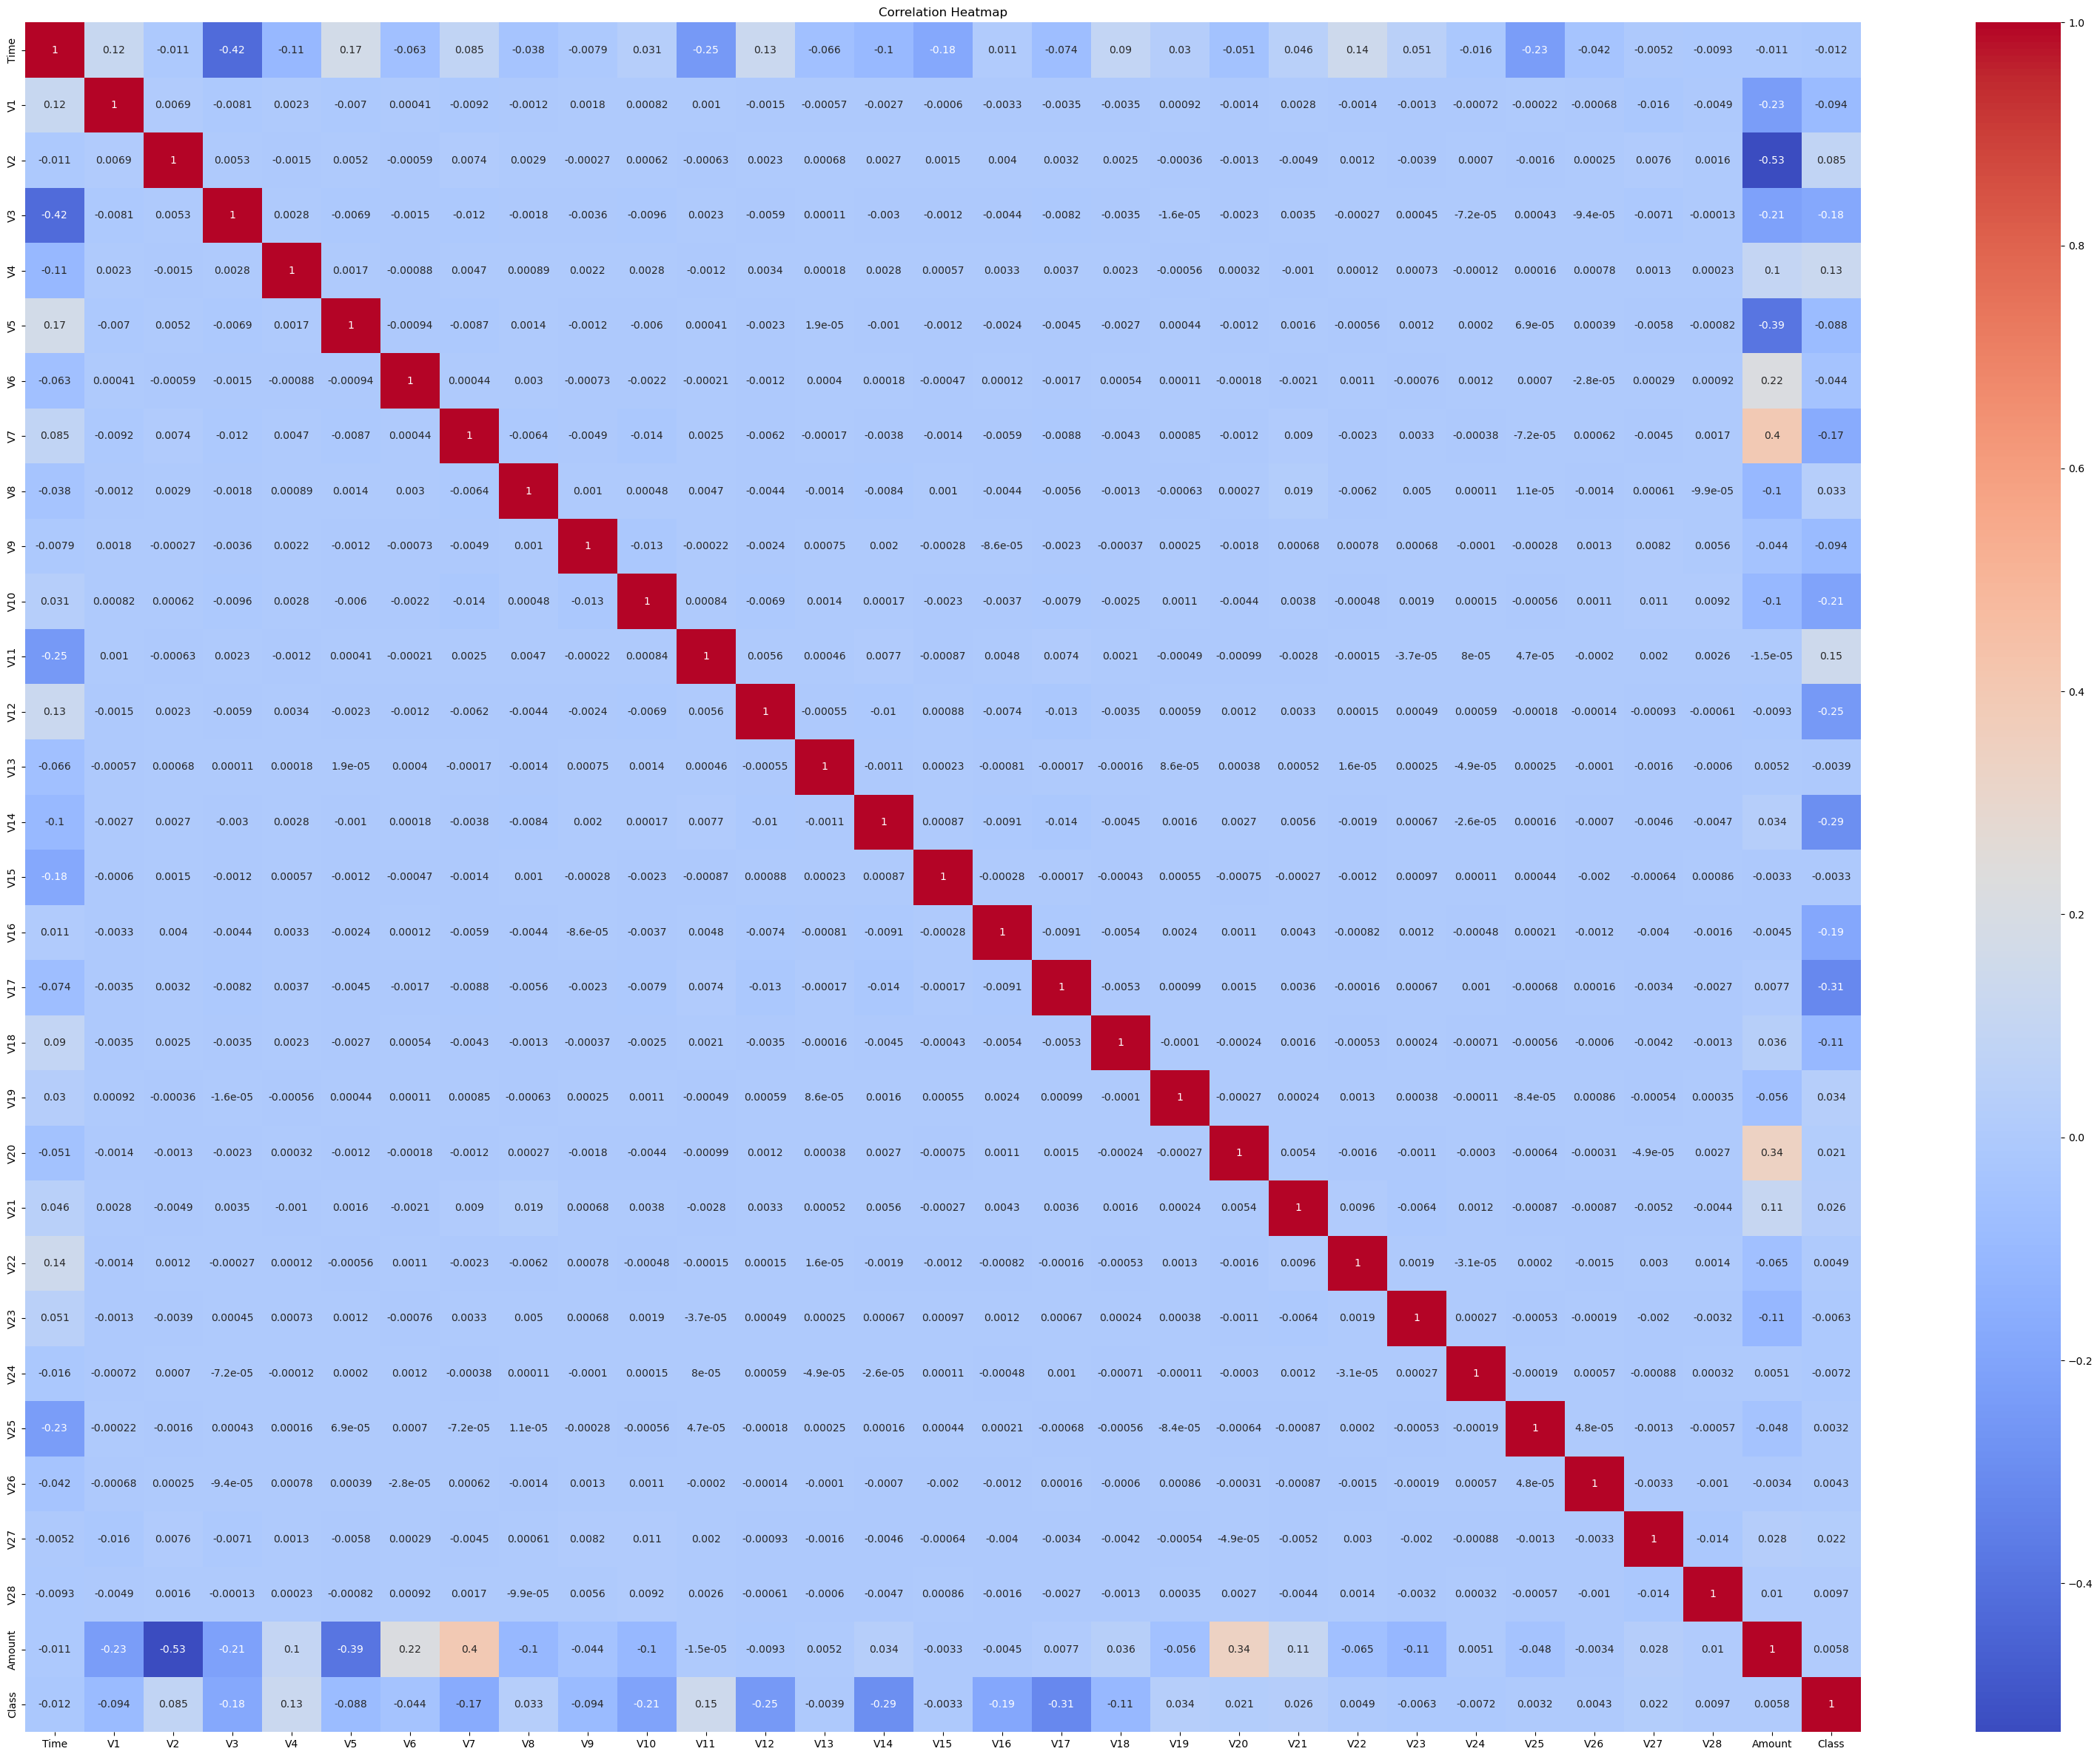

In [422]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

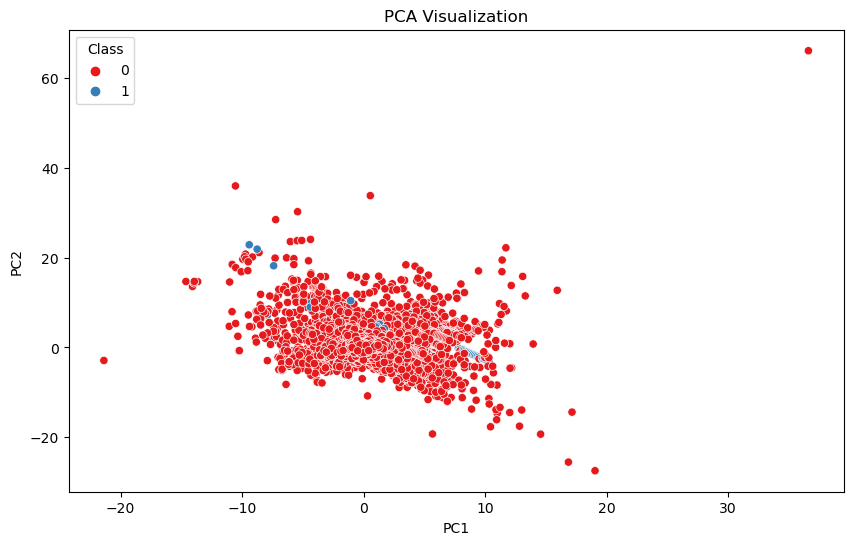

In [423]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, 1:29]) 

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Class'] = df['Class']

# Plot PCA visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='Set1')
plt.title('PCA Visualization')
plt.show()

<Figure size 1000x600 with 0 Axes>

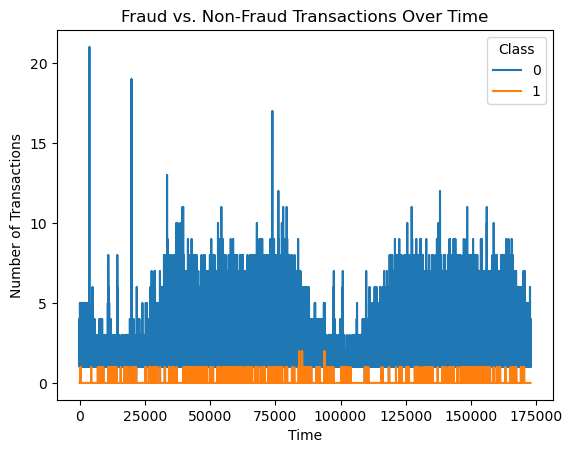

In [424]:
# Group transactions by 'Time' and 'Class' and count
time_class_counts = df.groupby(['Time', 'Class']).size().unstack(fill_value=0)

# Plot fraud vs. non-fraud transactions over time
plt.figure(figsize=(10, 6))
time_class_counts.plot(kind='line', stacked=False)
plt.title('Fraud vs. Non-Fraud Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()

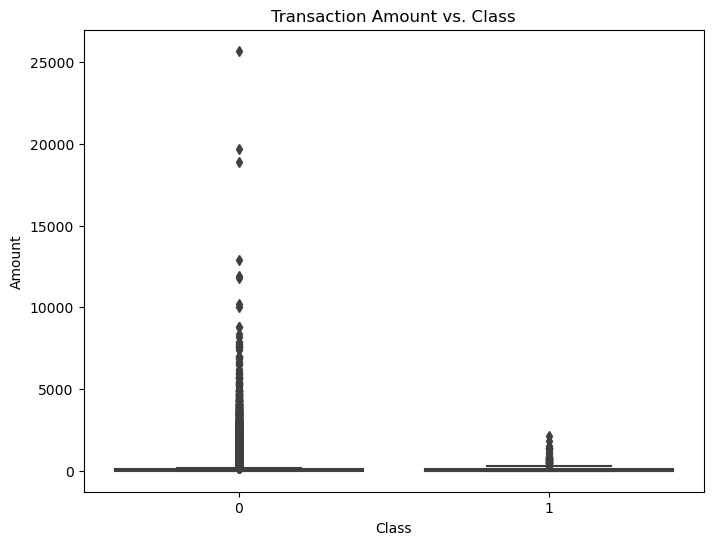

In [425]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount vs. Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

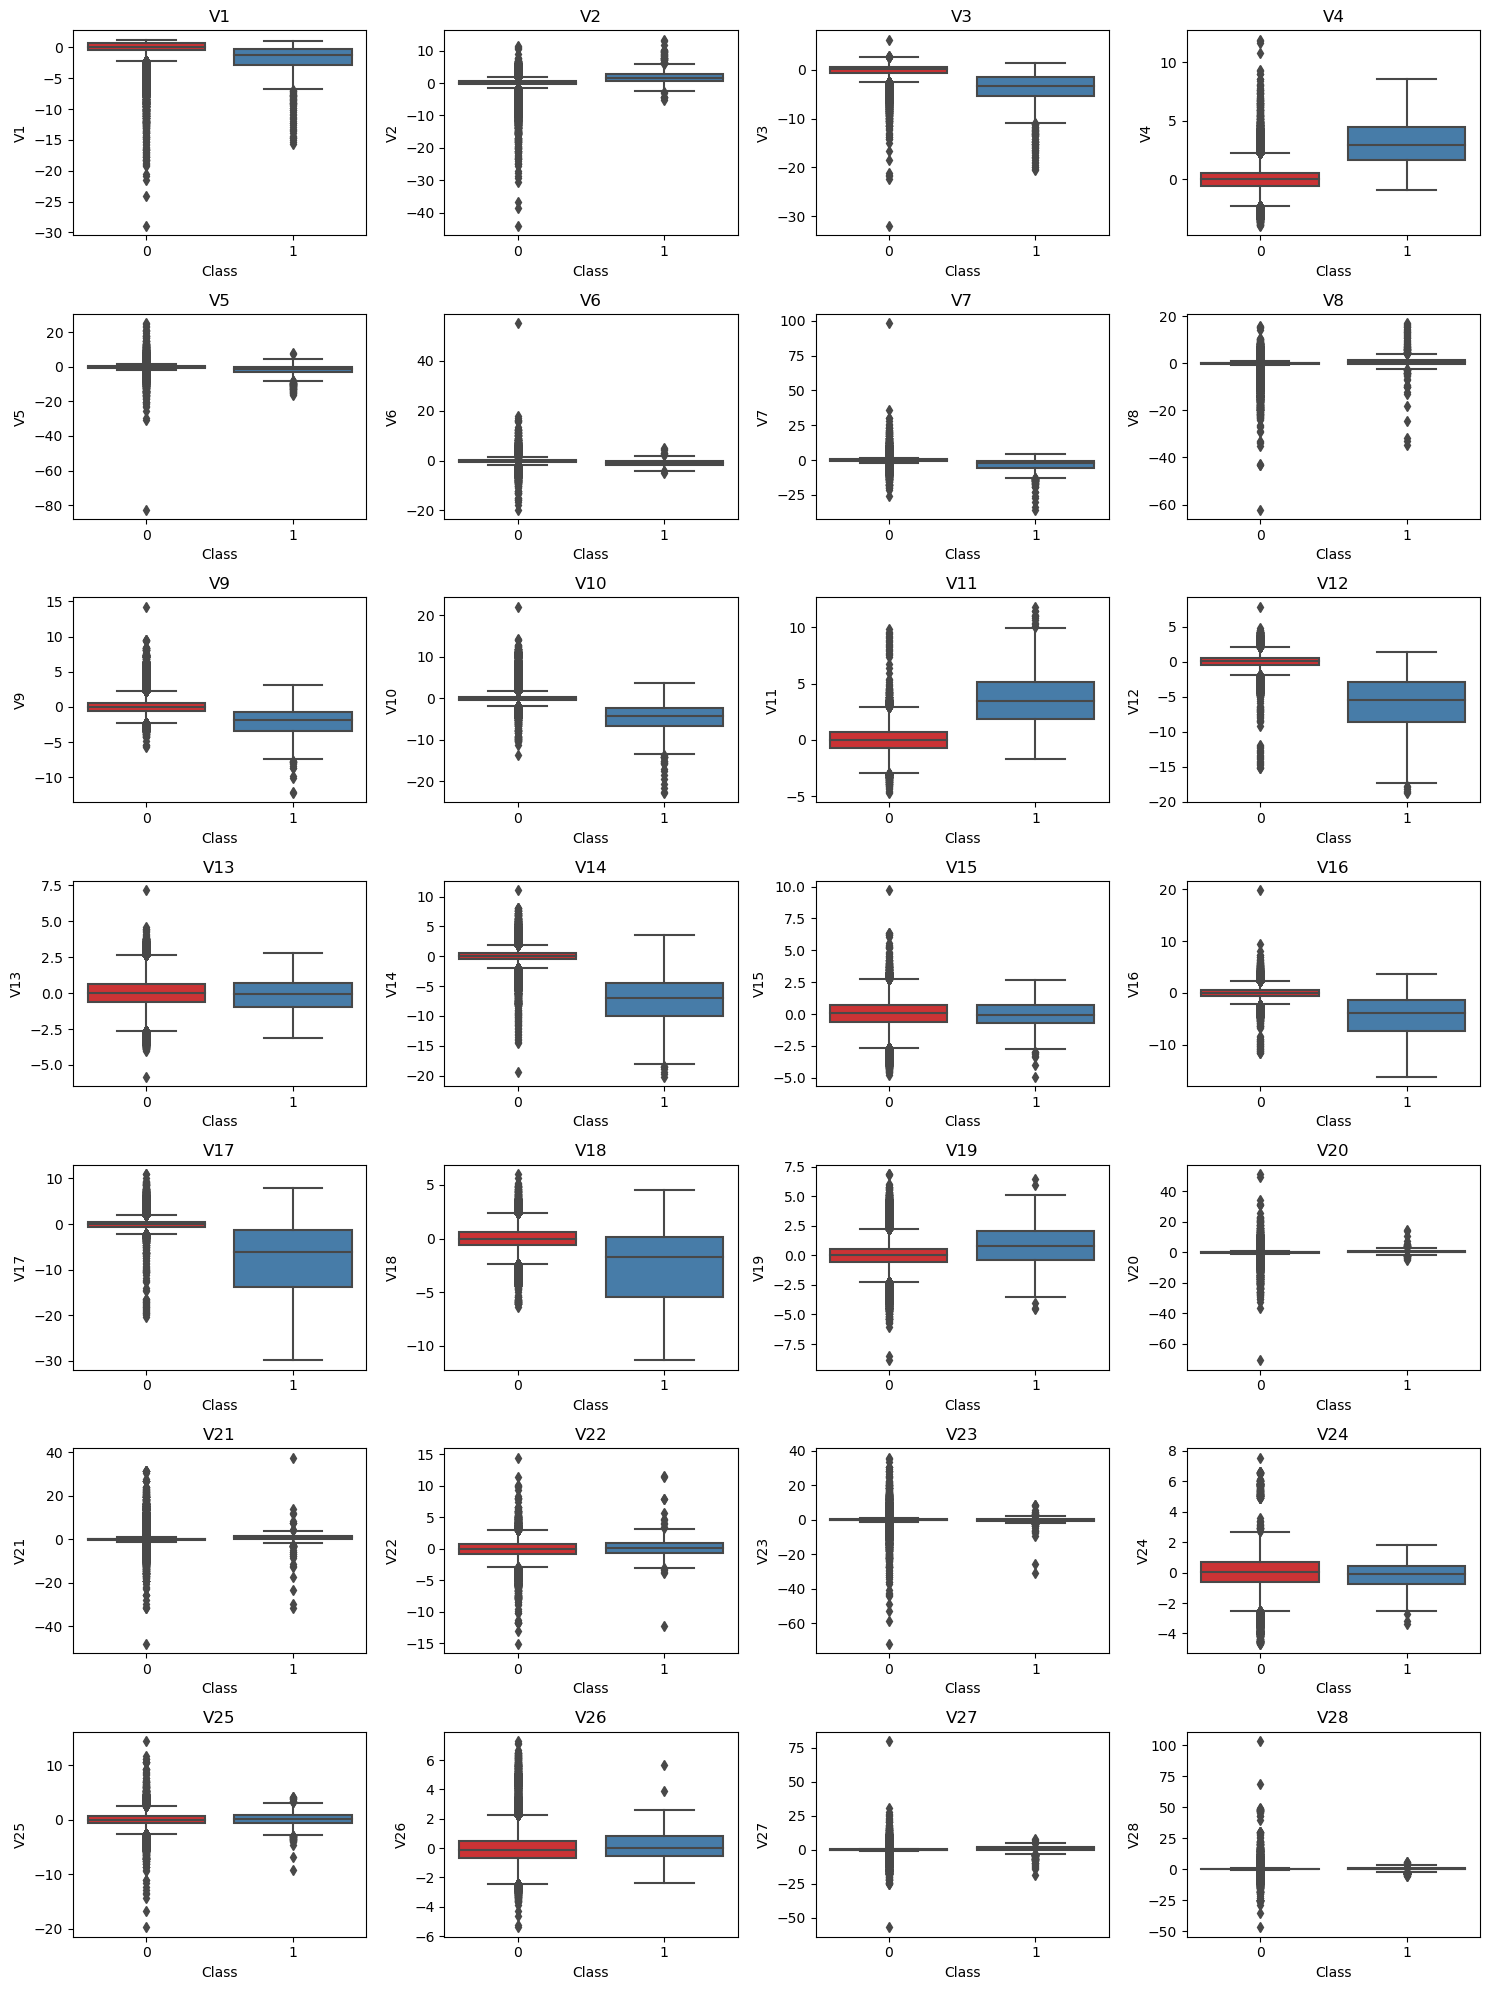

In [426]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns[1:29]):
    plt.subplot(7, 4, i+1)
    sns.boxplot(x='Class', y=col, data=df, palette='Set1')
    plt.title(col)
plt.tight_layout()
plt.show()

In [427]:
total_records = df.shape[0]
print("Total number of records:", total_records)

Total number of records: 283726


### Logistic Regression

In [430]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

In [428]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=42)

In [429]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104279,0.541255,-0.464417,0.106164,0.470651,0.808613,3.582511,-1.251653,1.108077,1.428630,-0.325101,...,0.066229,-0.134186,-0.041073,-0.275124,1.729120,1.340306,-0.452105,0.257666,0.122405,56.42
133849,-2.466668,2.642366,-0.607242,-0.636941,-0.632369,-0.587828,0.267259,0.494041,2.509680,4.392445,...,2.805502,-1.180377,-1.046534,0.235697,-0.035128,1.060319,0.017255,1.091198,-1.329890,9.82
42456,-0.795592,-0.158585,1.031555,-1.440984,-0.266023,-1.001789,0.134732,-0.021867,-1.344373,-0.160569,...,-0.451133,-0.560368,-1.312544,-0.236896,0.700267,0.157026,2.289290,-1.269183,-0.758543,46.08
875,0.111058,0.402733,0.864013,0.119658,-0.293583,-0.388375,-0.030088,-0.710926,-0.482591,-0.162371,...,-0.240172,0.763615,-1.326623,-0.023476,0.868460,1.440613,0.293625,0.113980,0.388142,3.58
262310,-0.140329,0.501395,0.368318,0.272182,0.975914,1.489686,0.262130,0.432783,-0.813756,-0.107358,...,0.223625,0.478626,1.604981,-0.893912,-1.479700,0.966103,1.151594,0.326219,0.145021,2.84


In [431]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(max_iter=5000)
log_regression.fit(X_train, y_train)

C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [432]:
from sklearn.metrics import accuracy_score
predictions = log_regression.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9991893701758714


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

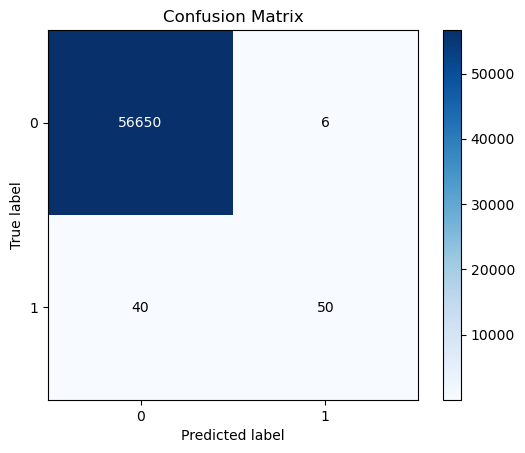

In [433]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

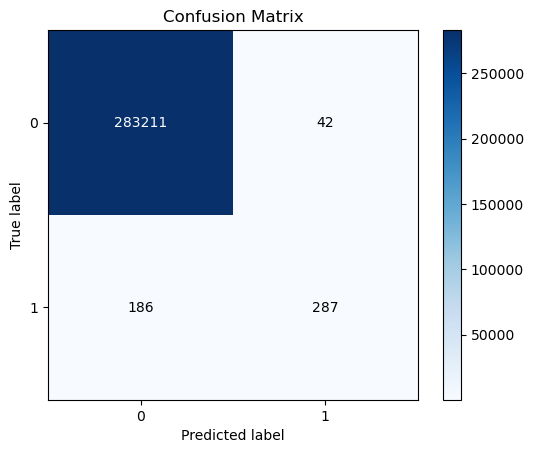

In [434]:
predictions_all = log_reg.predict(data_features)

skplt.metrics.plot_confusion_matrix(data_target, predictions_all)

In [435]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only {} frauds in the original dataset and {} no fraud'.format(str(number_fraud),str(number_no_fraud)))

There are only 473 frauds in the original dataset and 283253 no fraud


### UNDERSAMPLING TECHNIQUE

In [436]:
from sklearn.utils import resample
df_train_all = df

df_majority = df_train_all[df_train_all['Class'] == 0]
df_minority = df_train_all[df_train_all['Class'] == 1]
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(df_minority)))

df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=len(df_minority),  
                                   random_state=42)

In this dataset, we have 473 frauds so we need to take a similar number of non-fraud


In [437]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled = df_downsampled.sample(frac=1, random_state=42)

# Display class distribution after undersampling
print(df_downsampled.Class.value_counts())

0    473
1    473
Name: Class, dtype: int64


In [438]:
# Splitting the downsampled data into features and target
X = df_downsampled.drop(['Time', 'Class'],axis=1)
y = df_downsampled['Class']

In [439]:
# Splitting the data into training and testing sets
X_train_undersampled, X_test_undersampled, y_train_underampled, y_test_undersampled = train_test_split(X, y, test_size=0.2, random_state=42)

In [440]:
classifier_undersampling = LogisticRegression(max_iter=8000)

In [441]:
# Training the model
classifier_undersampling.fit(X_train_undersampled, y_train_underampled)

# Making predictions on the testing set
predictions = classifier_undersampling.predict(X_test_undersampled)

In [443]:
accuracy = accuracy_score(y_test_undersampled, predictions)
print("Accuracy:", accuracy)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test_undersampled, predictions)

Accuracy: 0.9473684210526315


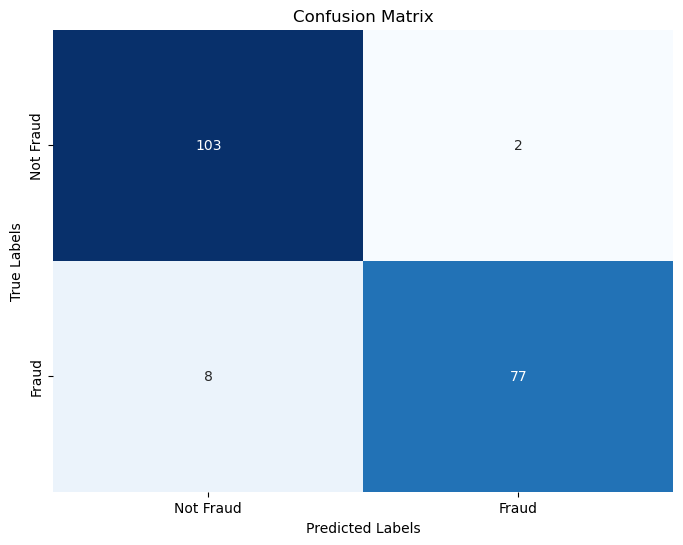

In [444]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

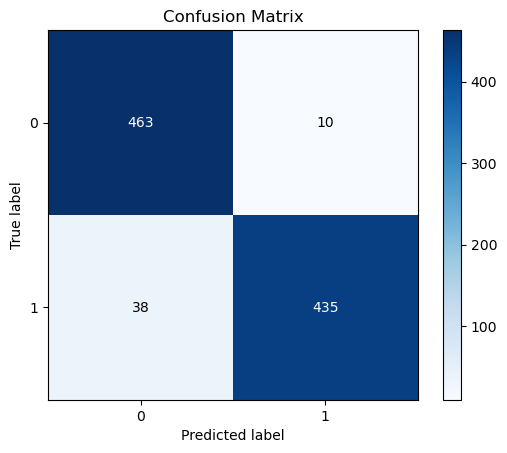

In [445]:
predictions_under_sampling= classifier_undersampling.predict(X)

skplt.metrics.plot_confusion_matrix(y, predictions_under_sampling)

In [446]:
from sklearn.metrics import classification_report

# Generate classification report for the entire downsampled dataset
class_report_full = classification_report(y, predictions_full)

# Print the classification report
print(class_report)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56656
       Fraud       0.89      0.46      0.60        90

    accuracy                           1.00     56746
   macro avg       0.95      0.73      0.80     56746
weighted avg       1.00      1.00      1.00     56746



### Over sampling using(SMOTE) approach

In [447]:
from imblearn.over_sampling import SMOTE

oversample=SMOTE()

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

In [448]:
num_samples_resampled = X_train_resampled.shape[0]
print(num_samples_resampled)

453194


In [449]:
df_resampled = pd.DataFrame({'Class': y_train_resampled}, index=range(len(y_train_resampled)))

class_counts = df_resampled['Class'].value_counts()

print("Distribution of Classes after SMOTE:")
print(class_counts)

Distribution of Classes after SMOTE:
0    226597
1    226597
Name: Class, dtype: int64


In [450]:
classifier_undersampling_smote = LogisticRegression(max_iter=8000)

In [451]:
classifier_undersampling_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=8000)

In [452]:
predictions_smote = classifier_undersampling_smote.predict(X_train_resampled)

# Compute accuracy
accuracy = accuracy_score(y_train_resampled, predictions_smote)
print("Accuracy:", accuracy)

conf_matrix_sample = confusion_matrix(y_train_resampled, predictions_smote)

Accuracy: 0.9620184733248895


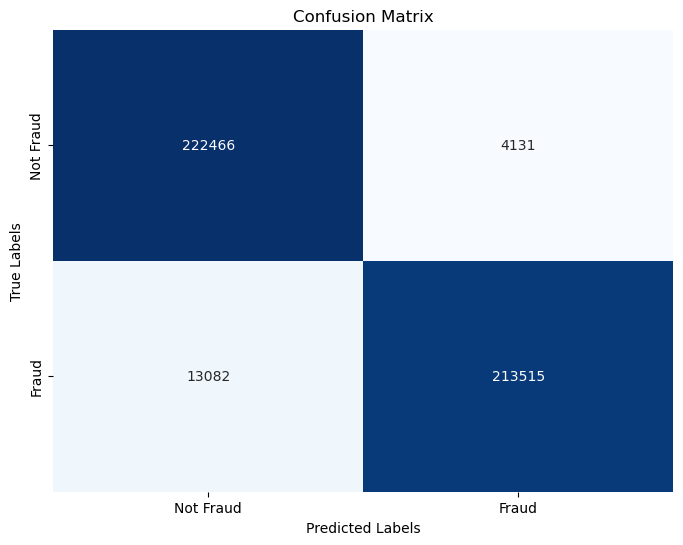

In [453]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sample, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

###  Hyperparameter Tuning Using Class Weights

In [454]:
class_weights = {0:0.6,1:0.4}
classifier_class_weighted = LogisticRegression(class_weight=class_weights)

In [455]:
classifier_class_weighted.fit(X_train,y_train)

C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.6, 1: 0.4})

In [456]:
predictions_class_weighted = classifier_class_weighted.predict(X_test)

C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [457]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_class_weighted)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_class_weighted)

Accuracy: 0.999048391076023


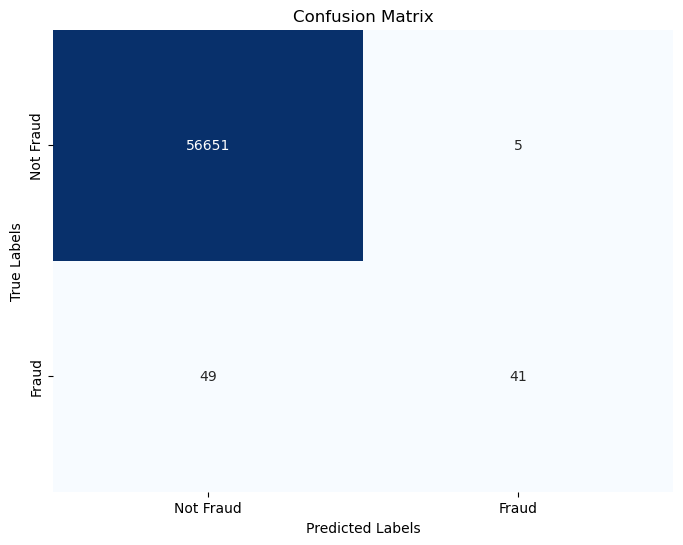

In [458]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_weighted, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [459]:
class_report = classification_report(y_test, predictions_class_weighted, target_names=['Not Fraud', 'Fraud'])

# Print the classification report
print(class_report)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56656
       Fraud       0.89      0.46      0.60        90

    accuracy                           1.00     56746
   macro avg       0.95      0.73      0.80     56746
weighted avg       1.00      1.00      1.00     56746



In [460]:
print ('Accuracy from sk-learn after hyperpaarameter tuning: {}'.format(classifier_class_weighted.score(X_test,y_test)))

Accuracy from sk-learn after hyperpaarameter tuning: 0.999048391076023


C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
